In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = pd.read_csv('default_on_payment.csv')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [3]:
cols_to_drop = ['Customer_ID', 'Telephone', 'Count']
d.drop(columns=cols_to_drop, axis = 1, inplace = True)

In [4]:
# If the mean is greater than the median: that indicates the data is right skewed
# If the mean is smaller than the median: that indicates the data is left skewed
d.describe(include='all')

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Foreign_Worker,Default_On_Payment
count,5000,5000.000000,5000,5000,5000.000000,5000,5000,5000.000000,5000,5000,5000.000000,5000,5000.000000,5000,5000,5000.000000,5000,5000.000000,5000,5000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A201,NaN
freq,1970,NaN,2650,1400,NaN,3015,1695,NaN,2740,4535,NaN,1660,NaN,4070,3565,NaN,3150,NaN,4815,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,0.299000
std,NaN,12.053989,NaN,NaN,2821.607329,NaN,NaN,1.118267,NaN,NaN,1.103276,NaN,11.370917,NaN,NaN,0.577423,NaN,0.361941,NaN,0.457866
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,1.000000


In [5]:
# d.isnull().sum()
# No null values

In [6]:
# Assuming these are Owned, Rent, and Mortgage
d.Housing.value_counts()

Housing
A152    3565
A151     895
A153     540
Name: count, dtype: int64

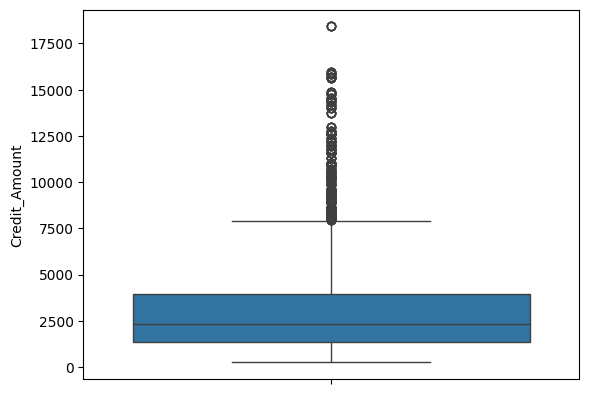

In [7]:
sns.boxplot(d.Credit_Amount)
plt.show()

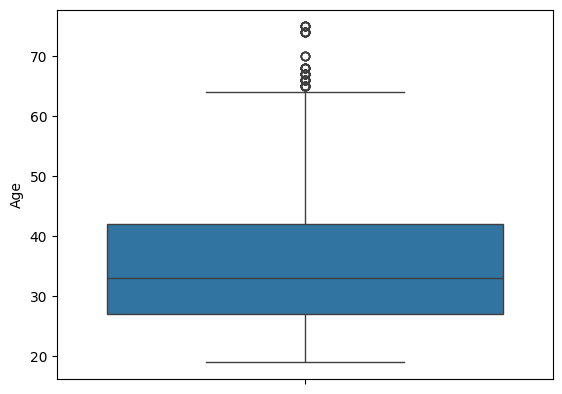

In [8]:
sns.boxplot(d.Age)
plt.show()

In [9]:
for col in d:
    if d[col].dtypes == 'object':
        print(col ,d[col].unique())

Status_Checking_Acc ['A11' 'A12' 'A14' 'A13']
Credit_History ['A34' 'A32' 'A33' 'A30' 'A31']
Purposre_Credit_Taken ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Savings_Acc ['A65' 'A61' 'A63' 'A64' 'A62']
Years_At_Present_Employment ['A75' 'A73' 'A74' 'A71' 'A72']
Marital_Status_Gender ['A93' 'A92' 'A91' 'A94']
Other_Debtors_Guarantors ['A101' 'A103' 'A102']
Property ['A121' 'A122' 'A124' 'A123']
Other_Inst_Plans  ['A143' 'A141' 'A142']
Housing ['A152' 'A153' 'A151']
Job ['A173' 'A172' 'A174' 'A171']
Foreign_Worker ['A201' 'A202']


In [10]:
objects = []
for col in d:
    if d[col].dtypes == 'object':
        objects.append(col)
print(objects)

['Status_Checking_Acc', 'Credit_History', 'Purposre_Credit_Taken', 'Savings_Acc', 'Years_At_Present_Employment', 'Marital_Status_Gender', 'Other_Debtors_Guarantors', 'Property', 'Other_Inst_Plans ', 'Housing', 'Job', 'Foreign_Worker']


In [11]:
d = pd.get_dummies(d, columns=objects, drop_first=True)

#### Data Split and Metrics

In [12]:
x = d.drop('Default_On_Payment', axis = 1)
y = d.Default_On_Payment

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
y_train = pd.DataFrame(y_train, columns=['Default_On_Payment'])
y_test = pd.DataFrame(y_test, columns=['Default_On_Payment'])

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual: ground truth
    '''
    cm = confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index=["Payment Defaulter", "Not Defaulter"],
                         columns=["Payment Defaulter", "Not Defaulter"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f" {v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

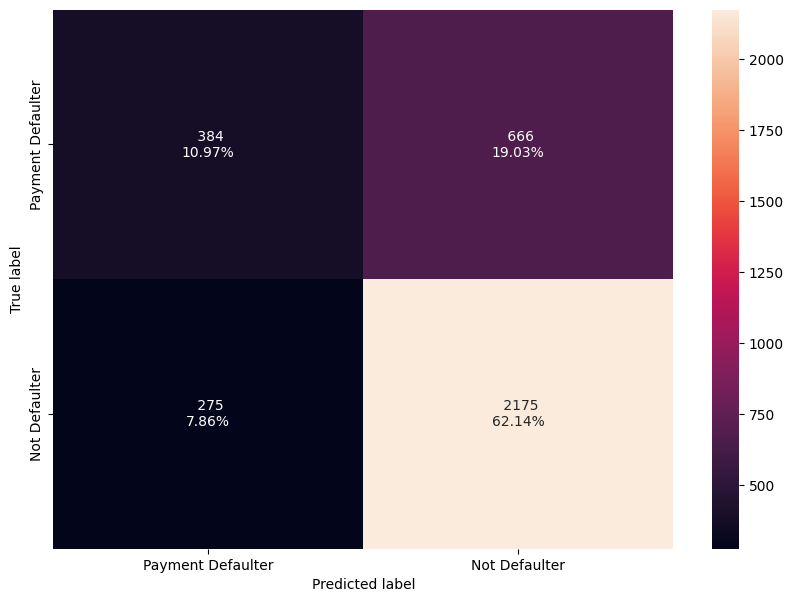

In [17]:
pred_train = model.predict(x_train)
make_confusion_matrix(y_train, pred_train)

In [18]:
pred_train_df = pd.DataFrame(pred_train, columns=['Predicted'])

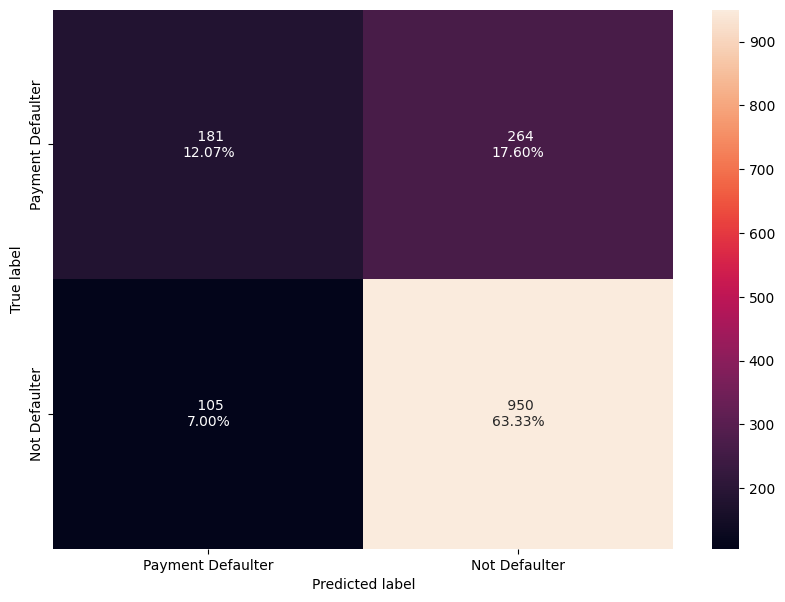

In [19]:
pred_test = model.predict(x_test)
make_confusion_matrix(y_test, pred_test)

In [20]:
pred_test_df = pd.DataFrame(pred_test, columns=['Predicted'])

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
print(f"The percentage of correctly predicted instances (both true positives and true negatives) out of the total instances.")
print(f'Accuracy on train data: {round(accuracy_score(y_train, pred_train), 4)*100}%')
print(f'Accuracy on test data: {round(accuracy_score(y_test, pred_test), 4)*100}%\n')

print(f"The percentage of actual positive instances that were correctly predicted.")
print(f'Recall on train data: {round(recall_score(y_train, pred_train), 4)*100}%')
print(f'Recall on test data: {round(recall_score(y_test, pred_test), 4)*100}%\n')

print(f"The percentage of predicted positive instances that were actually positive.")
print(f'Precision on train data: {round(precision_score(y_train, pred_train), 4)*100}%')
print(f'Precision on test data: {round(precision_score(y_test, pred_test), 4)*100}%\n')

print(f"A metric that combines both precision and recall into a single value. It is a balanced measure")
print(f'F1 score on train data: {round(f1_score(y_train, pred_train), 4)*100}%')
print(f'F1 score on test data: {round(f1_score(y_test, pred_test), 4)*100}%')

The percentage of correctly predicted instances (both true positives and true negatives) out of the total instances.
Accuracy on train data: 73.11%
Accuracy on test data: 75.4%

The percentage of actual positive instances that were correctly predicted.
Recall on train data: 36.57%
Recall on test data: 40.67%

The percentage of predicted positive instances that were actually positive.
Precision on train data: 58.269999999999996%
Precision on test data: 63.29%

A metric that combines both precision and recall into a single value. It is a balanced measure
F1 score on train data: 44.940000000000005%
F1 score on test data: 49.519999999999996%


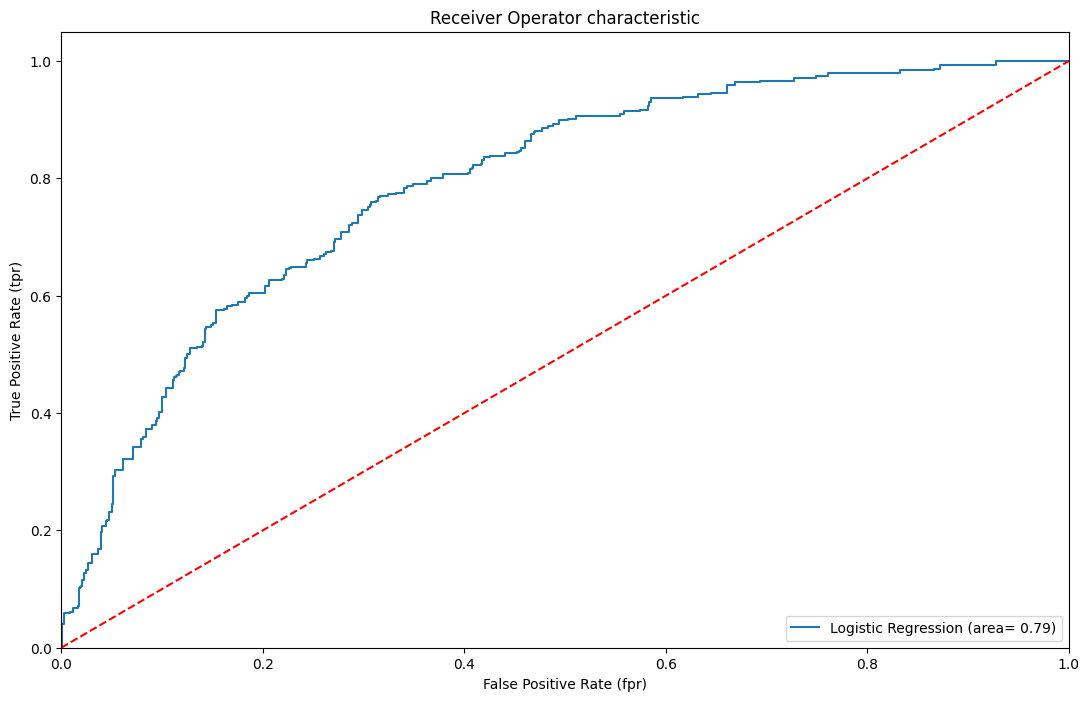

In [22]:
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, model.predict_proba(x_test) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [23]:
# Make Observation

In [24]:
train_pred_prob = model.predict_proba(x_train)[:,1]
train_pred_prob

array([0.02728297, 0.40120005, 0.18113588, ..., 0.03604582, 0.69966716,
       0.14441905])

In [25]:
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0, 1.01, 0.01)

for cutoff in Cutoff_Prob:
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 0)).sum()
    P = TP + FN
    N = TN + FP

    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    cutoff_data = cutoff_data._append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data
y_train.drop("pred_y", axis=1, inplace=True)

#### We've got the basic cutoff data. Let's now get all features needed to decide the cutoff

In [26]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2)** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [27]:
cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,0.00,1050.0,0.0,0.0,2450.0,1050.0,2450.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.300000,1.000000,1.000000,0.461538
1,0.01,1050.0,0.0,12.0,2438.0,1050.0,2450.0,1.000000,0.004898,0.995102,0.004898,1.000000,0.301032,1.000000,0.995102,0.462759
2,0.02,1050.0,0.0,46.0,2404.0,1050.0,2450.0,1.000000,0.018776,0.981224,0.018776,1.000000,0.303995,1.000000,0.981224,0.466252
3,0.03,1050.0,0.0,97.0,2353.0,1050.0,2450.0,1.000000,0.039592,0.960408,0.039592,1.000000,0.308551,1.000000,0.960408,0.471592
4,0.04,1048.0,2.0,196.0,2254.0,1050.0,2450.0,0.998095,0.080000,0.920002,0.078095,0.998095,0.317383,0.998095,0.920000,0.481618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,0.0,1050.0,2450.0,0.0,1050.0,2450.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
97,0.97,0.0,1050.0,2450.0,0.0,1050.0,2450.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
98,0.98,0.0,1050.0,2450.0,0.0,1050.0,2450.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
99,0.99,0.0,1050.0,2450.0,0.0,1050.0,2450.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN


In [28]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data ["Dist"]), "Cutoff_Prob"]
ks_cutoff =  cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.29
The KS cutoff determined is: 0.25
The f1 cutoff determined is: 0.25


In [29]:
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

for cutoff in cutoffs:
  y_pred_train = (model.predict_proba(x_train)[:,1]> cutoff).astype(int)
  y_pred_test = (model.predict_proba(x_test)[:,1]> cutoff).astype(int)

print("Using the cutoff value as:", cutoff)
print('\nAccuracy on train data:', accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
print("\nRecall on train data:", recall_score(y_train, y_pred_train))
print("Recall on test data:", recall_score(y_test, y_pred_test))
print("\nPrecision on train data:", precision_score(y_train, y_pred_train))
print("Precision on test data:", precision_score(y_test, y_pred_test))
print("\nf1 score on train data:", f1_score(y_train, y_pred_train))
print("f1 score on test data:", f1_score(y_test, y_pred_test))

Using the cutoff value as: 0.25

Accuracy on train data: 0.6882857142857143
Accuracy on test data: 0.684

Recall on train data: 0.8152380952380952
Recall on test data: 0.7955056179775281

Precision on train data: 0.4883057615516258
Precision on test data: 0.48032564450474896

f1 score on train data: 0.6107741705315733
f1 score on test data: 0.5989847715736041


In [30]:
default = 0.5
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]
results = []

for cutoff in cutoffs:
    y_pred_train = (model.predict_proba(x_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (model.predict_proba(x_test)[:, 1] > cutoff).astype(int)

    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_score(y_train, y_pred_train),
        'Accuracy_test': accuracy_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train': precision_score(y_train, y_pred_train),
        'Precision_test': precision_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),
        'F1_test': f1_score(y_test, y_pred_test),
    }

    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
res = pd.DataFrame(results)
res

,Cutoff,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,0.50,0.731143,0.754000,0.365714,0.406742,0.582701,0.632867,0.449386,0.495212
1,0.29,0.713143,0.712667,0.747619,0.730337,0.515092,0.511006,0.609946,0.601295
2,0.25,0.688286,0.684000,0.815238,0.795506,0.488306,0.480326,0.610774,0.598985
3,0.25,0.688286,0.684000,0.815238,0.795506,0.488306,0.480326,0.610774,0.598985


#### Alright, not that bad, heading onto to check for multicollinearity

In [31]:
import statsmodels.api as sm
from statsmodels.api import add_constant
# Creating a copy just in case
x1 = x.copy()
x1 = add_constant(x1)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3)
print("Size of X_train:", x_train.shape)
print("Size of X_test:", x_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

Size of X_train: (3500, 48)
Size of X_test: (1500, 48)
Size of y_train: (3500,)
Size of y_test: (1500,)


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif_after_dropping(X_train):
    # Calculate VIF for each independent variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    print("Updated VIF values after dropping variables:")
    print(vif_data)
    print("\n")
    # Return variables with VIF greater than the threshold
    high_vif_vars = vif_data[vif_data['VIF'] > 5]['Variable'].tolist()
    print(f"Variables with VIF greater than 5: {high_vif_vars} Len of it: {len(high_vif_vars)}")

In [34]:
boolean_columns = x_train.select_dtypes(include='bool').columns.tolist()
print(f"{boolean_columns} Len of columns: {len(boolean_columns)}")

['Status_Checking_Acc_A12', 'Status_Checking_Acc_A13', 'Status_Checking_Acc_A14', 'Credit_History_A31', 'Credit_History_A32', 'Credit_History_A33', 'Credit_History_A34', 'Purposre_Credit_Taken_A41', 'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42', 'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44', 'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46', 'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49', 'Savings_Acc_A62', 'Savings_Acc_A63', 'Savings_Acc_A64', 'Savings_Acc_A65', 'Years_At_Present_Employment_A72', 'Years_At_Present_Employment_A73', 'Years_At_Present_Employment_A74', 'Years_At_Present_Employment_A75', 'Marital_Status_Gender_A92', 'Marital_Status_Gender_A93', 'Marital_Status_Gender_A94', 'Other_Debtors_Guarantors_A102', 'Other_Debtors_Guarantors_A103', 'Property_A122', 'Property_A123', 'Property_A124', 'Other_Inst_Plans _A142', 'Other_Inst_Plans _A143', 'Housing_A152', 'Housing_A153', 'Job_A172', 'Job_A173', 'Job_A174', 'Foreign_Worker_A202'] Len o

In [35]:
x_train[boolean_columns] = x_train[boolean_columns].astype(int)

In [36]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

                           Variable         VIF
0                             const  188.386828
45                         Job_A173   15.815490
44                         Job_A172   11.550963
46                         Job_A174    8.515424
12               Credit_History_A32    7.917206
14               Credit_History_A34    6.813067
29  Years_At_Present_Employment_A73    6.565232
33        Marital_Status_Gender_A93    5.934307
31  Years_At_Present_Employment_A75    5.491853
32        Marital_Status_Gender_A92    5.339034
30  Years_At_Present_Employment_A74    4.543044
28  Years_At_Present_Employment_A72    4.429011
39                    Property_A124    3.334552
43                     Housing_A153    3.157425
13               Credit_History_A33    3.056611
34        Marital_Status_Gender_A94    2.910583
2                     Credit_Amount    2.610804
11               Credit_History_A31    2.397452
1                Duration_in_Months    2.073697
10          Status_Checking_Acc_A14    1

In [37]:
x_train = x_train.drop("Job_A173", axis=1)
check_vif_after_dropping(x_train)

Updated VIF values after dropping variables:
                           Variable         VIF
0                             const  155.218164
12               Credit_History_A32    7.917166
14               Credit_History_A34    6.812745
33        Marital_Status_Gender_A93    5.926914
32        Marital_Status_Gender_A92    5.315726
29  Years_At_Present_Employment_A73    5.271433
31  Years_At_Present_Employment_A75    4.454105
30  Years_At_Present_Employment_A74    3.737383
28  Years_At_Present_Employment_A72    3.735546
39                    Property_A124    3.334282
43                     Housing_A153    3.154723
13               Credit_History_A33    3.053445
34        Marital_Status_Gender_A94    2.907023
2                     Credit_Amount    2.602316
11               Credit_History_A31    2.394037
1                Duration_in_Months    2.069872
10          Status_Checking_Acc_A14    1.794481
42                     Housing_A152    1.782949
18        Purposre_Credit_Taken_A43    1.78

In [38]:
x_train = x_train.drop("Credit_History_A32", axis=1)
check_vif_after_dropping(x_train)

Updated VIF values after dropping variables:
                           Variable         VIF
0                             const  116.615442
32        Marital_Status_Gender_A93    5.925939
31        Marital_Status_Gender_A92    5.314632
28  Years_At_Present_Employment_A73    5.255037
30  Years_At_Present_Employment_A75    4.449052
29  Years_At_Present_Employment_A74    3.737377
27  Years_At_Present_Employment_A72    3.728077
38                    Property_A124    3.328148
42                     Housing_A153    3.152949
33        Marital_Status_Gender_A94    2.906994
2                     Credit_Amount    2.580892
1                Duration_in_Months    2.068931
10          Status_Checking_Acc_A14    1.793344
41                     Housing_A152    1.782526
17        Purposre_Credit_Taken_A43    1.780190
37                    Property_A123    1.773296
8           Status_Checking_Acc_A12    1.662887
13               Credit_History_A34    1.624483
16        Purposre_Credit_Taken_A42    1.60

In [39]:
x_train = x_train.drop("Marital_Status_Gender_A93", axis=1)
check_vif_after_dropping(x_train)

Updated VIF values after dropping variables:
                           Variable         VIF
0                             const  102.278660
28  Years_At_Present_Employment_A73    5.250920
30  Years_At_Present_Employment_A75    4.448149
29  Years_At_Present_Employment_A74    3.736839
27  Years_At_Present_Employment_A72    3.715940
37                    Property_A124    3.321070
41                     Housing_A153    3.151886
2                     Credit_Amount    2.578265
1                Duration_in_Months    2.067548
10          Status_Checking_Acc_A14    1.785309
40                     Housing_A152    1.782320
17        Purposre_Credit_Taken_A43    1.779711
36                    Property_A123    1.771511
8           Status_Checking_Acc_A12    1.659938
13               Credit_History_A34    1.624483
16        Purposre_Credit_Taken_A42    1.598380
35                    Property_A122    1.576175
6                            Num_CC    1.514698
5                               Age    1.48

In [40]:
x_train = x_train.drop("Years_At_Present_Employment_A73", axis=1)
check_vif_after_dropping(x_train)

Updated VIF values after dropping variables:
                           Variable        VIF
0                             const  81.898278
36                    Property_A124   3.314419
40                     Housing_A153   3.150995
2                     Credit_Amount   2.573266
1                Duration_in_Months   2.065731
39                     Housing_A152   1.781360
10          Status_Checking_Acc_A14   1.779828
17        Purposre_Credit_Taken_A43   1.777496
35                    Property_A123   1.771229
8           Status_Checking_Acc_A12   1.658600
13               Credit_History_A34   1.623631
16        Purposre_Credit_Taken_A42   1.596961
34                    Property_A122   1.573104
29  Years_At_Present_Employment_A75   1.525193
6                            Num_CC   1.514683
14        Purposre_Credit_Taken_A41   1.478381
5                               Age   1.451772
22        Purposre_Credit_Taken_A49   1.431815
38           Other_Inst_Plans _A143   1.417707
3              

#### Cool, it seems the work multicollinearity has been done

In [41]:
print(x_train.columns, len(x_train.columns))

Index(['const', 'Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income',
       'Current_Address_Yrs', 'Age', 'Num_CC', 'Dependents',
       'Status_Checking_Acc_A12', 'Status_Checking_Acc_A13',
       'Status_Checking_Acc_A14', 'Credit_History_A31', 'Credit_History_A33',
       'Credit_History_A34', 'Purposre_Credit_Taken_A41',
       'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42',
       'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44',
       'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46',
       'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49',
       'Savings_Acc_A62', 'Savings_Acc_A63', 'Savings_Acc_A64',
       'Savings_Acc_A65', 'Years_At_Present_Employment_A72',
       'Years_At_Present_Employment_A74', 'Years_At_Present_Employment_A75',
       'Marital_Status_Gender_A92', 'Marital_Status_Gender_A94',
       'Other_Debtors_Guarantors_A102', 'Other_Debtors_Guarantors_A103',
       'Property_A122', 'Property_A123', 'Property_A124',
       'Ot

In [42]:
def find_top_n_p_values(lres, n=3):
    # Access the summary table
    summary_table = lres.summary()
    # Extract P>|z| values from the summary
    p_values = [float(row[4]) for row in summary_table.tables[1].data[1:]] 
    # Find the top N P>|z| values and their corresponding variables
    top_n_p_values = sorted(set(p_values), reverse=True)[:n]
    top_n_variables = [row[0] for row in summary_table.tables[1].data[1:] if float(row[4]) in top_n_p_values]
    return top_n_variables, top_n_p_values

In [43]:
lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.448561
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3456
Method:                           MLE   Df Model:                           43
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2619
Time:                        19:24:53   Log-Likelihood:                -1570.0
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                2.447e-205
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3147      0.384     -0.819  

In [44]:
x_train = x_train.drop('Current_Address_Yrs', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.448604
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3457
Method:                           MLE   Df Model:                           42
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2618
Time:                        19:25:05   Log-Likelihood:                -1570.1
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                5.459e-206
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3679      0.372     -0.989  

In [45]:
x_train = x_train.drop('Purposre_Credit_Taken_A46', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.448654
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3458
Method:                           MLE   Df Model:                           41
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2617
Time:                        19:25:17   Log-Likelihood:                -1570.3
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                1.230e-206
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3827      0.371     -1.031  

In [46]:
x_train = x_train.drop('Years_At_Present_Employment_A75', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.448669
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3459
Method:                           MLE   Df Model:                           40
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2617
Time:                        19:25:35   Log-Likelihood:                -1570.3
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                2.432e-207
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3740      0.370     -1.010  

In [47]:
x_train = x_train.drop('Property_A123', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.448817
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3460
Method:                           MLE   Df Model:                           39
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2614
Time:                        19:25:51   Log-Likelihood:                -1570.9
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                7.464e-208
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3097      0.364     -0.850  

In [48]:
x_train = x_train.drop('Other_Debtors_Guarantors_A102', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.449056
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3461
Method:                           MLE   Df Model:                           38
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2610
Time:                        19:26:03   Log-Likelihood:                -1571.7
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                3.073e-208
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.2938      0.364     -0.806  

In [49]:
x_train = x_train.drop('Purposre_Credit_Taken_A45', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.449296
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3462
Method:                           MLE   Df Model:                           37
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2606
Time:                        19:26:15   Log-Likelihood:                -1572.5
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                1.256e-208
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.2687      0.363     -0.739  

In [50]:
x_train = x_train.drop('Job_A172', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.449308
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3463
Method:                           MLE   Df Model:                           36
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2606
Time:                        19:26:26   Log-Likelihood:                -1572.6
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                2.339e-209
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.2766      0.362     -0.763  

In [51]:
x_train = x_train.drop('Marital_Status_Gender_A94', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.449545
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3464
Method:                           MLE   Df Model:                           35
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2602
Time:                        19:26:39   Log-Likelihood:                -1573.4
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                9.230e-210
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.1501      0.349     -0.430  

In [52]:
x_train = x_train.drop('Job_A174', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.449777
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3465
Method:                           MLE   Df Model:                           34
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2599
Time:                        19:26:49   Log-Likelihood:                -1574.2
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                3.529e-210
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.1391      0.349     -0.399  

In [53]:
x_train = x_train.drop('Purposre_Credit_Taken_A44', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.450080
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3466
Method:                           MLE   Df Model:                           33
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2594
Time:                        19:27:01   Log-Likelihood:                -1575.3
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                1.693e-210
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.1704      0.348     -0.490  

In [54]:
x_train = x_train.drop('Credit_History_A33', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.450442
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3467
Method:                           MLE   Df Model:                           32
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2588
Time:                        19:27:11   Log-Likelihood:                -1576.5
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                9.817e-211
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.1254      0.346     -0.362  

In [55]:
x_train = x_train.drop('Other_Inst_Plans _A142', axis=1)

lrm = sm.Logit(y_train, x_train)
lres = lrm.fit()
print(lres.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.450901
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3468
Method:                           MLE   Df Model:                           31
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2580
Time:                        19:27:24   Log-Likelihood:                -1578.2
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                7.793e-211
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.2012      0.344     -0.585  

In [56]:
x_train_fin = x_train.drop('Years_At_Present_Employment_A72', axis=1)

lrm_fin = sm.Logit(y_train, x_train_fin)
lres_fin = lrm_fin.fit()
print(lres_fin.summary())
top_n_variables, top_n_p_values = find_top_n_p_values(lres_fin, n=3)
for variable, p_value in zip(top_n_variables, top_n_p_values):
    print(f"Variable: {variable} - P>|z|: {p_value}")

Optimization terminated successfully.
         Current function value: 0.451444
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Default_On_Payment   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3469
Method:                           MLE   Df Model:                           30
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2571
Time:                        19:27:57   Log-Likelihood:                -1580.1
converged:                       True   LL-Null:                       -2126.9
Covariance Type:            nonrobust   LLR p-value:                8.146e-211
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0838      0.338     -0.248  

In [57]:
print(x_train_fin.columns, len(x_train_fin.columns))

Index(['const', 'Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income', 'Age',
       'Num_CC', 'Dependents', 'Status_Checking_Acc_A12',
       'Status_Checking_Acc_A13', 'Status_Checking_Acc_A14',
       'Credit_History_A31', 'Credit_History_A34', 'Purposre_Credit_Taken_A41',
       'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42',
       'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A48',
       'Purposre_Credit_Taken_A49', 'Savings_Acc_A62', 'Savings_Acc_A63',
       'Savings_Acc_A64', 'Savings_Acc_A65', 'Years_At_Present_Employment_A74',
       'Marital_Status_Gender_A92', 'Other_Debtors_Guarantors_A103',
       'Property_A122', 'Property_A124', 'Other_Inst_Plans _A143',
       'Housing_A152', 'Housing_A153', 'Foreign_Worker_A202'],
      dtype='object') 31


#### For test set

In [63]:
boolean_columns = x_test.select_dtypes(include='bool').columns.tolist()
print(f"{boolean_columns} Len of columns: {len(boolean_columns)}")

['Status_Checking_Acc_A12', 'Status_Checking_Acc_A13', 'Status_Checking_Acc_A14', 'Credit_History_A31', 'Credit_History_A32', 'Credit_History_A33', 'Credit_History_A34', 'Purposre_Credit_Taken_A41', 'Purposre_Credit_Taken_A410', 'Purposre_Credit_Taken_A42', 'Purposre_Credit_Taken_A43', 'Purposre_Credit_Taken_A44', 'Purposre_Credit_Taken_A45', 'Purposre_Credit_Taken_A46', 'Purposre_Credit_Taken_A48', 'Purposre_Credit_Taken_A49', 'Savings_Acc_A62', 'Savings_Acc_A63', 'Savings_Acc_A64', 'Savings_Acc_A65', 'Years_At_Present_Employment_A72', 'Years_At_Present_Employment_A73', 'Years_At_Present_Employment_A74', 'Years_At_Present_Employment_A75', 'Marital_Status_Gender_A92', 'Marital_Status_Gender_A93', 'Marital_Status_Gender_A94', 'Other_Debtors_Guarantors_A102', 'Other_Debtors_Guarantors_A103', 'Property_A122', 'Property_A123', 'Property_A124', 'Other_Inst_Plans _A142', 'Other_Inst_Plans _A143', 'Housing_A152', 'Housing_A153', 'Job_A172', 'Job_A173', 'Job_A174', 'Foreign_Worker_A202'] Len o

In [64]:
x_test[boolean_columns] = x_test[boolean_columns].astype(int)

In [65]:
vif_data1 = pd.DataFrame()
vif_data1["Variable"] = x_test.columns
vif_data1["VIF"] = [variance_inflation_factor(x_test.values, i) for i in range(x_test.shape[1])]
vif_data1 = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data1)

                           Variable         VIF
0                             const  188.386828
45                         Job_A173   15.815490
44                         Job_A172   11.550963
46                         Job_A174    8.515424
12               Credit_History_A32    7.917206
14               Credit_History_A34    6.813067
29  Years_At_Present_Employment_A73    6.565232
33        Marital_Status_Gender_A93    5.934307
31  Years_At_Present_Employment_A75    5.491853
32        Marital_Status_Gender_A92    5.339034
30  Years_At_Present_Employment_A74    4.543044
28  Years_At_Present_Employment_A72    4.429011
39                    Property_A124    3.334552
43                     Housing_A153    3.157425
13               Credit_History_A33    3.056611
34        Marital_Status_Gender_A94    2.910583
2                     Credit_Amount    2.610804
11               Credit_History_A31    2.397452
1                Duration_in_Months    2.073697
10          Status_Checking_Acc_A14    1

In [66]:
x_test = x_test.drop("Job_A173", axis=1)
check_vif_after_dropping(x_test)

Updated VIF values after dropping variables:
                           Variable         VIF
0                             const  151.905829
12               Credit_History_A32    8.042136
14               Credit_History_A34    6.675120
33        Marital_Status_Gender_A93    5.925551
32        Marital_Status_Gender_A92    5.395733
29  Years_At_Present_Employment_A73    4.852438
31  Years_At_Present_Employment_A75    4.152468
28  Years_At_Present_Employment_A72    3.819659
30  Years_At_Present_Employment_A74    3.563904
39                    Property_A124    3.320415
43                     Housing_A153    3.258497
13               Credit_History_A33    3.205652
34        Marital_Status_Gender_A94    2.656830
11               Credit_History_A31    2.468922
2                     Credit_Amount    2.407001
1                Duration_in_Months    2.033422
10          Status_Checking_Acc_A14    1.857852
38                    Property_A123    1.802960
6                            Num_CC    1.78

In [67]:
x_test = x_test.drop("Credit_History_A32", axis=1)
check_vif_after_dropping(x_test)

Updated VIF values after dropping variables:
                           Variable         VIF
0                             const  115.667959
32        Marital_Status_Gender_A93    5.904909
31        Marital_Status_Gender_A92    5.386895
28  Years_At_Present_Employment_A73    4.848289
30  Years_At_Present_Employment_A75    4.151922
27  Years_At_Present_Employment_A72    3.819578
29  Years_At_Present_Employment_A74    3.561747
38                    Property_A124    3.314753
42                     Housing_A153    3.246060
33        Marital_Status_Gender_A94    2.656810
2                     Credit_Amount    2.397259
1                Duration_in_Months    2.031179
10          Status_Checking_Acc_A14    1.855277
37                    Property_A123    1.802914
41                     Housing_A152    1.776703
13               Credit_History_A34    1.748193
17        Purposre_Credit_Taken_A43    1.746117
8           Status_Checking_Acc_A12    1.735536
6                            Num_CC    1.69

In [68]:
x_test = x_test.drop("Marital_Status_Gender_A93", axis=1)
check_vif_after_dropping(x_test)

Updated VIF values after dropping variables:
                           Variable         VIF
0                             const  102.730373
28  Years_At_Present_Employment_A73    4.848108
30  Years_At_Present_Employment_A75    4.151841
27  Years_At_Present_Employment_A72    3.813645
29  Years_At_Present_Employment_A74    3.561383
37                    Property_A124    3.311752
41                     Housing_A153    3.245960
2                     Credit_Amount    2.394802
1                Duration_in_Months    2.031131
10          Status_Checking_Acc_A14    1.841601
36                    Property_A123    1.802770
40                     Housing_A152    1.775229
13               Credit_History_A34    1.748169
17        Purposre_Credit_Taken_A43    1.745356
8           Status_Checking_Acc_A12    1.730888
6                            Num_CC    1.691784
16        Purposre_Credit_Taken_A42    1.584063
35                    Property_A122    1.573412
39           Other_Inst_Plans _A143    1.53

In [69]:
x_test_fin = x_test[x_train_fin.columns]

In [70]:
y_pred = lres_fin.predict(x_test_fin)

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_fin, y_train)

LogisticRegression()

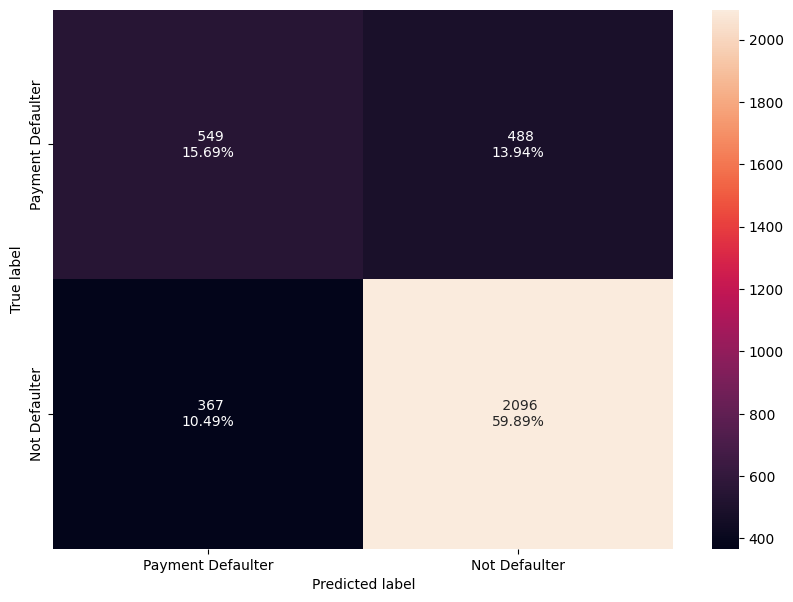

In [72]:
pred_train1 = lr.predict(x_train_fin)
make_confusion_matrix(y_train, pred_train1)

In [73]:
pred_train1 = pd.DataFrame(pred_train1, columns=['Predicted'])

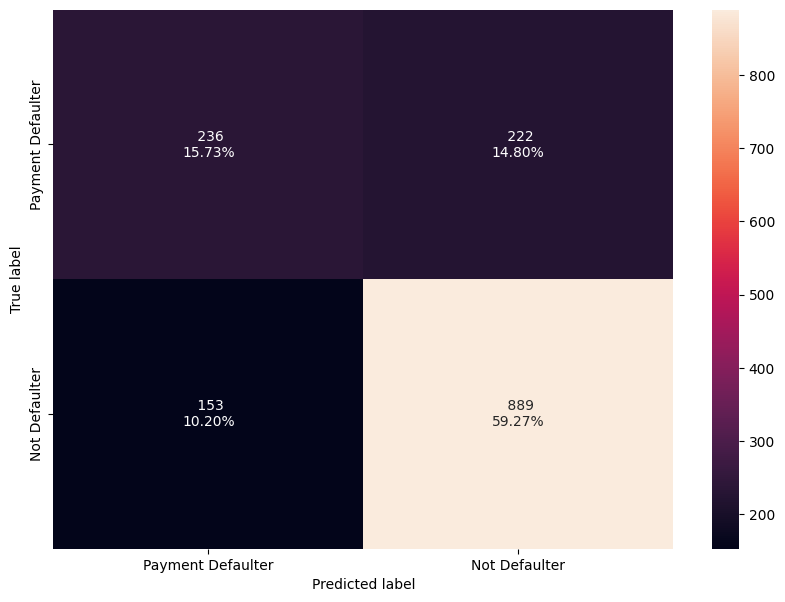

In [75]:
pred_test1 = lr.predict(x_test_fin)
make_confusion_matrix(y_test, pred_test1)

In [76]:
pred_test1 = pd.DataFrame(pred_test1, columns=['Predicted'])

In [79]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
print(f"The percentage of correctly predicted instances (both true positives and true negatives) out of the total instances.")
print(f'Accuracy on train data: {round(accuracy_score(y_train, pred_train1), 4)*100}%')
print(f'Accuracy on test data: {round(accuracy_score(y_test, pred_test1), 4)*100}%\n')

print(f"The percentage of actual positive instances that were correctly predicted.")
print(f'Recall on train data: {round(recall_score(y_train, pred_train1), 4)*100}%')
print(f'Recall on test data: {round(recall_score(y_test, pred_test1), 4)*100}%\n')

print(f"The percentage of predicted positive instances that were actually positive.")
print(f'Precision on train data: {round(precision_score(y_train, pred_train1), 4)*100}%')
print(f'Precision on test data: {round(precision_score(y_test, pred_test1), 4)*100}%\n')

print(f"A metric that combines both precision and recall into a single value. It is a balanced measure")
print(f'F1 score on train data: {round(f1_score(y_train, pred_train1), 4)*100}%')
print(f'F1 score on test data: {round(f1_score(y_test, pred_test1), 4)*100}%')

The percentage of correctly predicted instances (both true positives and true negatives) out of the total instances.
Accuracy on train data: 75.57000000000001%
Accuracy on test data: 75.0%

The percentage of actual positive instances that were correctly predicted.
Recall on train data: 52.94%
Recall on test data: 51.53%

The percentage of predicted positive instances that were actually positive.
Precision on train data: 59.93000000000001%
Precision on test data: 60.67%

A metric that combines both precision and recall into a single value. It is a balanced measure
F1 score on train data: 56.220000000000006%
F1 score on test data: 55.730000000000004%


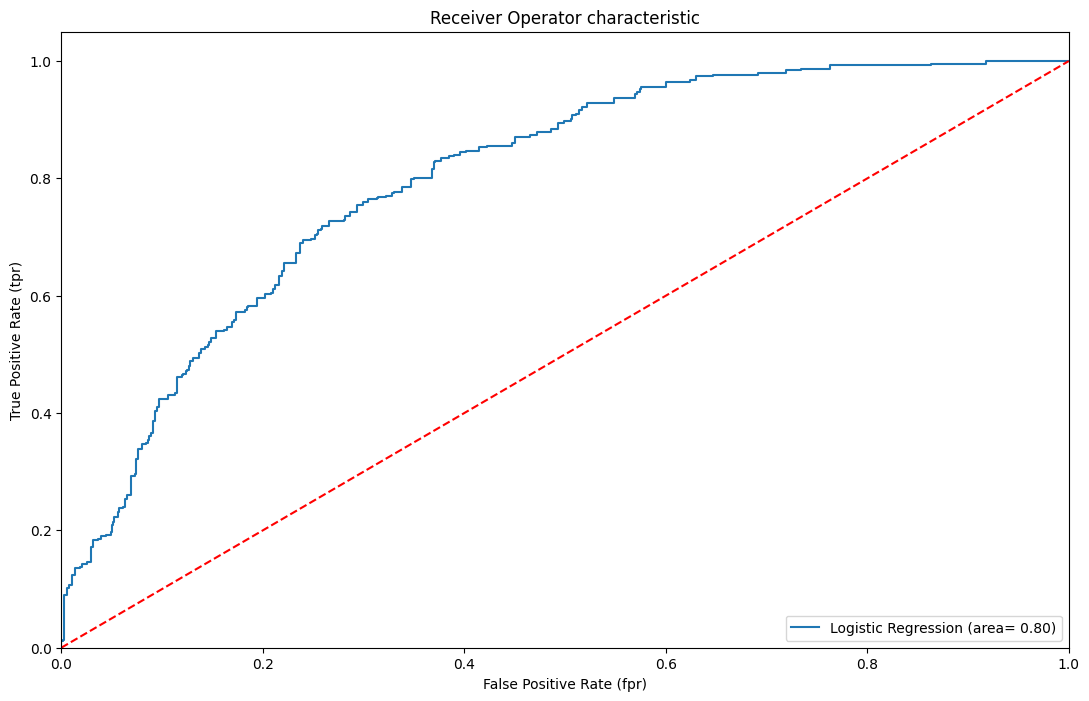

In [80]:
logit_roc_auc = roc_auc_score(y_test, lr.predict_proba(x_test_fin)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, lr.predict_proba(x_test_fin) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
train_pred_prob = lr.predict_proba(x_train_fin)[:,1]
train_pred_prob

array([0.06196374, 0.42845908, 0.38899335, ..., 0.45934582, 0.28137042,
       0.05927956])

In [82]:
y_train = pd.DataFrame(y_train, columns=['Default_On_Payment'])
y_train.shape

(3500, 1)

In [83]:
train_pred_prob= pd.DataFrame(train_pred_prob, columns=['Pred_Default'])
train_pred_prob

,Pred_Default
0,0.061964
1,0.428459
2,0.388993
3,0.197641
4,0.274920
...,...
3495,0.862342
3496,0.725629
3497,0.459346
3498,0.281370


In [85]:
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0, 1.01, 0.01)

for cutoff in Cutoff_Prob:
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Default_On_Payment == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Default_On_Payment == 0)).sum()
    P = TP + FN
    N = TN + FP

    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    cutoff_data = cutoff_data._append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data
y_train.drop("pred_y", axis=1, inplace=True)

In [86]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2)** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [88]:
cutoff_data

,Cutoff_Prob,TP,FN,TN,FP,P,N,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,0.00,708.0,0.0,0.0,1728.0,708.0,1728.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.290640,1.000000,1.000000,0.450382
1,0.01,700.0,8.0,21.0,1707.0,708.0,1728.0,0.988701,0.012153,0.987912,0.000853,0.988701,0.290818,0.988701,0.987847,0.449438
2,0.02,684.0,24.0,65.0,1663.0,708.0,1728.0,0.966102,0.037616,0.962981,0.003717,0.966102,0.291436,0.966102,0.962384,0.447791
3,0.03,663.0,45.0,126.0,1602.0,708.0,1728.0,0.936441,0.072917,0.929260,0.009357,0.936441,0.292715,0.936441,0.927083,0.446014
4,0.04,639.0,69.0,185.0,1543.0,708.0,1728.0,0.902542,0.107060,0.898242,0.009603,0.902542,0.292851,0.902542,0.892940,0.442215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,1.0,707.0,1726.0,2.0,708.0,1728.0,0.001412,0.998843,0.998588,0.000255,0.001412,0.333333,0.001412,0.001157,0.002813
97,0.97,0.0,708.0,1728.0,0.0,708.0,1728.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
98,0.98,0.0,708.0,1728.0,0.0,708.0,1728.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
99,0.99,0.0,708.0,1728.0,0.0,708.0,1728.0,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN


In [89]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data ["Dist"]), "Cutoff_Prob"]
ks_cutoff =  cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.21
The KS cutoff determined is: 0.29
The f1 cutoff determined is: 0.0


In [90]:
default = 0.5
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]

for cutoff in cutoffs:
  y_pred_train = (lr.predict_proba(x_train_fin)[:,1]> cutoff).astype(int)
  y_pred_test = (lr.predict_proba(x_test_fin)[:,1]> cutoff).astype(int)

  print("Using the cutoff value as:", cutoff)
  print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
  print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
  print("Recall on train data:", recall_score(y_train, y_pred_train))
  print("Recall on test data:", recall_score(y_test, y_pred_test))
  print("Precision on train data:", precision_score(y_train, y_pred_train))
  print("Precision on test data:", precision_score(y_test, y_pred_test))
  print("f1 score on train data:", f1_score(y_train, y_pred_train))
  print("f1 score on test data:", f1_score(y_test, y_pred_test))
  print("\n")

Using the cutoff value as: 0.5
Accuracy on train data: 0.7557142857142857
Accuracy on test data: 0.75
Recall on train data: 0.5294117647058824
Recall on test data: 0.5152838427947598
Precision on train data: 0.5993449781659389
Precision on test data: 0.6066838046272494
f1 score on train data: 0.5622119815668203
f1 score on test data: 0.5572609208972845


Using the cutoff value as: 0.21
Accuracy on train data: 0.6602857142857143
Accuracy on test data: 0.6626666666666666
Recall on train data: 0.8804243008678881
Recall on test data: 0.8558951965065502
Precision on train data: 0.461577350859454
Precision on test data: 0.47115384615384615
f1 score on train data: 0.6056384742951908
f1 score on test data: 0.6077519379844961


Using the cutoff value as: 0.29
Accuracy on train data: 0.7097142857142857
Accuracy on test data: 0.7106666666666667
Recall on train data: 0.7801350048216008
Recall on test data: 0.7663755458515283
Precision on train data: 0.506574827802129
Precision on test data: 0.5176

In [91]:
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]
results = []

for cutoff in cutoffs:
    y_pred_train = (lr.predict_proba(x_train_fin)[:, 1] > cutoff).astype(int)
    y_pred_test = (lr.predict_proba(x_test_fin)[:, 1] > cutoff).astype(int)

    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_score(y_train, y_pred_train),
        'Accuracy_test': accuracy_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train': precision_score(y_train, y_pred_train),
        'Precision_test': precision_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),
        'F1_test': f1_score(y_test, y_pred_test),
        }

    results.append(result_dict)

res1 = pd.DataFrame(results)
res1

,Cutoff,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,0.50,0.755714,0.750000,0.529412,0.515284,0.599345,0.606684,0.562212,0.557261
1,0.21,0.660286,0.662667,0.880424,0.855895,0.461577,0.471154,0.605638,0.607752
2,0.29,0.709714,0.710667,0.780135,0.766376,0.506575,0.517699,0.614275,0.617958
3,0.00,0.296286,0.305333,1.000000,1.000000,0.296286,0.305333,0.457130,0.467824


In [92]:
result_df = pd.concat([res, res1], axis=0, ignore_index=True)
result_df

,Cutoff,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,0.50,0.731143,0.754000,0.365714,0.406742,0.582701,0.632867,0.449386,0.495212
1,0.29,0.713143,0.712667,0.747619,0.730337,0.515092,0.511006,0.609946,0.601295
2,0.25,0.688286,0.684000,0.815238,0.795506,0.488306,0.480326,0.610774,0.598985
3,0.25,0.688286,0.684000,0.815238,0.795506,0.488306,0.480326,0.610774,0.598985
4,0.50,0.755714,0.750000,0.529412,0.515284,0.599345,0.606684,0.562212,0.557261
5,0.21,0.660286,0.662667,0.880424,0.855895,0.461577,0.471154,0.605638,0.607752
6,0.29,0.709714,0.710667,0.780135,0.766376,0.506575,0.517699,0.614275,0.617958
7,0.00,0.296286,0.305333,1.000000,1.000000,0.296286,0.305333,0.457130,0.467824
